In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.9.0


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


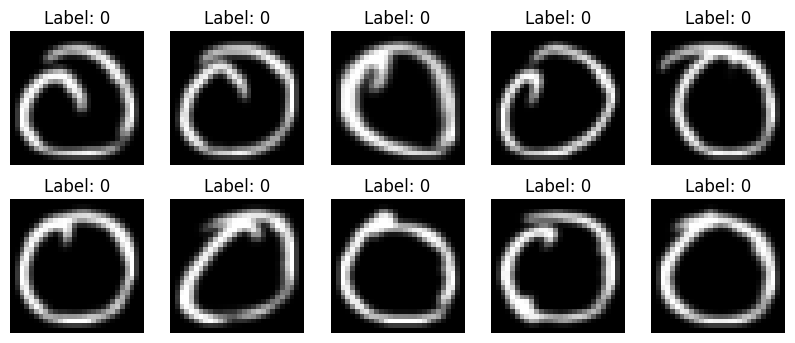

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Define dataset paths
train_dir = "dataset/Train/"
test_dir = "dataset/Test/"

# Define image size
img_height, img_width = 28, 28

def load_images_from_folder(folder):
    images = []
    labels = []
    # Sorted class names (digit_0, digit_1, ...)
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(
        class_names)}  # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
# Shape (num_samples, 28, 28, 1)
x_train = x_train.reshape(-1, img_height, img_width, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

# Build the Model:

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [ ]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)
    # Flatten layer
    x = keras.layers.Flatten()(inputs)
    # Hidden layers
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)
    # Output layer
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    # Create model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the model
functional_model = build_functional_model()
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="sgd",  # Stochastic Gradient Descent
    loss="categorical_crossentropy",  # Loss function for multi-class classification
    metrics=["accuracy"]  # Track accuracy during training
)

In [ ]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1181 - loss: 2.3009 - val_accuracy: 0.0000e+00 - val_loss: 4.1267
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1229 - loss: 2.1856 - val_accuracy: 0.0000e+00 - val_loss: 4.4541
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1304 - loss: 2.1845 - val_accuracy: 0.0000e+00 - val_loss: 4.7351
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1248 - loss: 2.1829 - val_accuracy: 0.0000e+00 - val_loss: 4.9127
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1277 - loss: 2.1780 - val_accuracy: 0.0000e+00 - val_loss: 5.0349


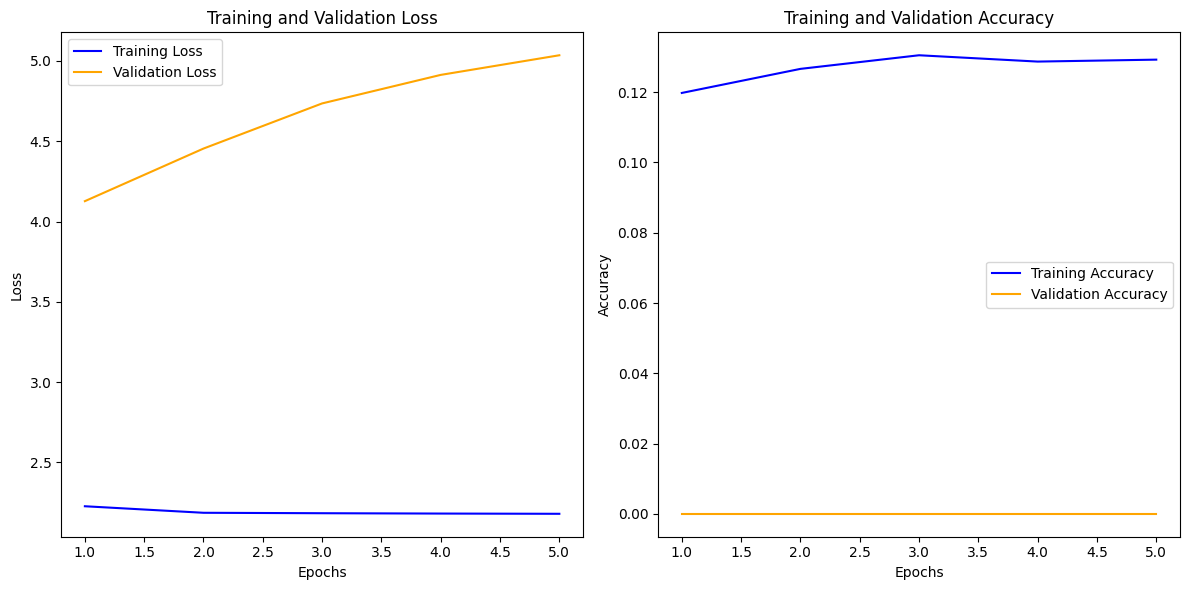

In [ ]:
import matplotlib.pyplot as plt
# Assuming "history" is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")
plt.plot(range(1, len(val_loss) + 1), val_loss, label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label="Training Accuracy", color="blue")
plt.plot(range(1, len(val_acc) + 1), val_acc, label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.1160 - loss: 2.6081
Test accuracy: 0.1160


In [ ]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 4
True label for first image: 0


# Exercise

Task 1: Data Preparation

In [ ]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical

# Define the path to the dataset (train folder for training and test for testing)
train_path = 'dataset/Train/'
test_path = 'dataset/Test/'

# Helper function to load and preprocess images
def load_data(data_path):
    images = []
    labels = []
    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            # Extract numeric label from folder name (e.g., 'digit_0' -> 0)
            numeric_label = int(label.split('_')[1])  # Get the number after 'digit_'
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                # Load image using PIL
                img = Image.open(image_path).convert('L')  # Convert to grayscale
                img = img.resize((28, 28))  # Resize to 28x28
                img = np.array(img) / 255.0  # Normalize the image to 0-1
                images.append(img)
                labels.append(numeric_label)  # Append numeric label
    return np.array(images), np.array(labels)

# Load training and testing data
x_train, y_train = load_data(train_path)
x_test, y_test = load_data(test_path)

# Reshape images to 28x28x1
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the data to ensure everything looks good
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training data shape: (17000, 28, 28, 1)
Testing data shape: (3000, 28, 28, 1)
Training labels shape: (17000, 10)
Testing labels shape: (3000, 10)


Task 2: Build the FCN Model

In [ ]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Input layer
    layers.Flatten(),  # Flatten the 28x28 images into 784-dimensional vectors
    layers.Dense(64, activation='sigmoid'),  # 1st hidden layer
    layers.Dense(128, activation='sigmoid'),  # 2nd hidden layer
    layers.Dense(256, activation='sigmoid'),  # 3rd hidden layer
    layers.Dense(10, activation='softmax')  # Output layer with softmax activation
])

# Display model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3: Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Suitable loss function for multi-class classification
    metrics=['accuracy']
)


Task 4: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
callbacks = [
    ModelCheckpoint(filepath="devnagari_model_best.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=4, verbose=1)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/20

Epoch 1: val_loss improved from inf to 7.46758, saving model to devnagari_model_best.h5


107/107 - 2s - 16ms/step - accuracy: 0.4875 - loss: 1.5802 - val_accuracy: 0.0000e+00 - val_loss: 7.4676
Epoch 2/20

Epoch 2: val_loss did not improve from 7.46758
107/107 - 0s - 4ms/step - accuracy: 0.8343 - loss: 0.5184 - val_accuracy: 0.0000e+00 - val_loss: 8.8274
Epoch 3/20

Epoch 3: val_loss did not improve from 7.46758
107/107 - 0s - 4ms/step - accuracy: 0.9171 - loss: 0.2842 - val_accuracy: 0.0000e+00 - val_loss: 9.6265
Epoch 4/20

Epoch 4: val_loss did not improve from 7.46758
107/107 - 0s - 4ms/step - accuracy: 0.9423 - loss: 0.1984 - val_accuracy: 0.0000e+00 - val_loss: 10.1091
Epoch 5/20

Epoch 5: val_loss did not improve from 7.46758
107/107 - 1s - 5ms/step - accuracy: 0.9565 - loss: 0.1529 - val_accuracy: 0.0000e+00 - val_loss: 10.3554
Epoch 5: early stopping


Task 5: Evaluate the Model

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


94/94 - 0s - 3ms/step - accuracy: 0.7630 - loss: 2.2086
Test accuracy: 0.7630


Task 6: Save and Load the Model

In [ ]:
# Save the model
model.save('devnagari_model.h5')

# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('devnagari_model.h5')

# Evaluate the loaded model on the test set
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy of loaded model: {test_acc:.4f}")


94/94 - 0s - 5ms/step - accuracy: 0.7630 - loss: 2.2086
Test accuracy of loaded model: 0.7630


Task 7: Predictions

In [ ]:
# Predict on test data
predictions = model.predict(x_test)

# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 0
True label for first image: 0


Visualization

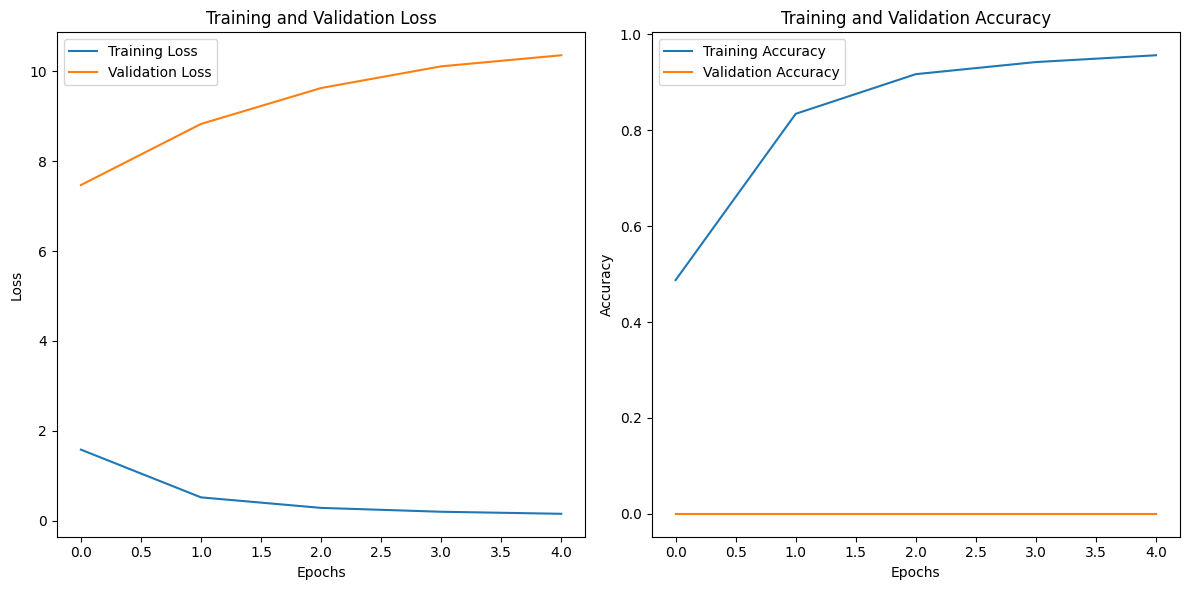

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
